### 부산지역 자치구별 주유소 정보 수집

- 1일 1회(혹은 1일 여러번인지는 사전 점검 필요)
- 대상 사이트 : http://www.opinet.co.kr/searRgSelect.do
- api 제공(X), 사용자 조작을 통한 동적 처리가 예상, ajax 사용, POSt 방식 사용
> - selenium 모듀을 사용하여 사람이 직접 데이터를 수집하는 행위를 그대로 보고
> - 프로그램화 하여 자동화시킨다
- pip install selenium
- 웹 자동화가 구동될수 있는 웹드라이버 다운
- chrome(일반적 사용). phantom(고스트브라우저(백드라운드에서처리)->UI가없는 OS에 적합)
- http://chromedriver.chromium.org/downloads
- ./data  밑에 압축 해제

In [3]:
from selenium import webdriver as wd

In [4]:
# 기본 접속
driver = wd.Chrome('./chromedriver.exe')
driver.get( 'http://www.opinet.co.kr/searRgSelect.do' )

In [7]:
# 검색의 1차는 광역시도 선택
# 광역시도까지 선택하는 요소를 찾아서 값을 설정한다 => #SIDO_NM0
sido = driver.find_element_by_css_selector('#SIDO_NM0')
sido.send_keys('부산광역시')

In [8]:
# 부산광역시에 솏한 시군구 목록
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')

In [9]:
# 자식들
options  = sigungu.find_elements_by_tag_name('option')
gu_names = [ option.get_attribute('value')  for option in options ]
gu_names

['',
 '강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [10]:
gu_names.remove('')

In [11]:
gu_names

['강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [12]:
# 금정구 선택하시오
sigungu.send_keys('금정구')
# 폼전을 하기 때문에 => 페이지가 다 올라올대까지 기다린다 !!

In [13]:
# 조회 클릭 -> 생략 가능 
#driver.find_element_by_css_selector('#searRgSelect').click()
# 엑셀 다운 -> #glopopd_excel
# 샘플로 한세트를 구현해서 데이터가 하나더 많아질수 있으므로 전체 구동시 주석
#driver.find_element_by_css_selector('#glopopd_excel').click()

In [14]:
# 부산시에 있는 모든 군구에 주유 정보 엑셀 파일을 다운받는다
# 중간에 페이지 로드 대기 코든
import time

# 강제 대기
time.sleep(2)

In [18]:
# 164.125.66.175
from tqdm import tqdm_notebook
for gu in tqdm_notebook(gu_names):
    print( gu )
    # 부산시
    sido = driver.find_element_by_css_selector('#SIDO_NM0')
    sido.send_keys('부산광역시')
    # 시군구
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    # 잠시 대기
    time.sleep(3)
    driver.find_element_by_css_selector('#glopopd_excel').click()

강서구
금정구
기장군
남구
동구
동래구
부산진구
북구
사상구
사하구
서구
수영구
연제구
영도구
중구
해운대구



In [15]:
# 크롤링 실습 1: 
# 인터파크 투어 접속
# 파리로 검색
# 패키지 상품 이름, 가격, 기간, 평점, 썸네일 주소, 
# , 세부 내용 주소 획득
# 세부 내용 들어가서 상품 특징 획득
# 해당 전체 목록을 다 수집해서 디비에 입력

In [16]:
# 크롤링 실습 2:
# 국내 항공사 사이트에서 이벤트 정보 가져오기
# 진에어, 에어부산, 제주항공, 티웨이, 이스타, 에어서울, 아시아나, 대한항공
# 특가 혹은 얼리버드 이벤트 => html을 통으로 가져오거나, 텍스트 수집등

In [17]:
# 다운 받은 엑셀 데이터 로드
# 브라우저에서 설정된 다운로드위치를 고려하여 
import pandas as pd
from glob import glob
# glob : 파일 처리를쉽게 해결

In [18]:
# 윈도우 기준 경로법 (파일 불러오는 경로, 파일 삭제 여부, 혹은 파일 이동, 파일 업로드부분 고려)
download_files = glob('C:\\Users\\User\\Downloads\\지역*.xls')
download_files

['C:\\Users\\User\\Downloads\\지역_위치별(주유소) (1).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (10).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (11).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (12).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (13).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (14).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (15).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (2).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (3).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (4).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (5).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (6).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (7).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (8).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소) (9).xls',
 'C:\\Users\\User\\Downloads\\지역_위치별(주유소).xls']

In [19]:
# 부산시 의 개별구의 개수와 동일
print( len(download_files) == len(gu_names) )

True


In [20]:
# 파일을 읽어들여서 dataframe으로 포함
tmp_raw_data = []
for fileName in download_files:
    # xls를 읽어서 df로 로드
    tmp = pd.read_excel( fileName, header=2 )
    tmp_raw_data.append( tmp )

len( tmp_raw_data )

16

In [21]:
# 16개의 df를 병합 해라
tmp_raw_df =pd.concat( tmp_raw_data )
tmp_raw_df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),알뜰주유소,051-582-5882,N,-,1473,1318,-
1,부산광역시,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,SK에너지,051-513-2700,N,-,1478,1323,-


In [22]:
# 부산시 총 주유소 개수
len(tmp_raw_df.index)

421

In [23]:
tmp_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 48
Data columns (total 10 columns):
지역       421 non-null object
상호       421 non-null object
주소       421 non-null object
상표       421 non-null object
전화번호     421 non-null object
셀프여부     421 non-null object
고급휘발유    421 non-null object
휘발유      421 non-null object
경유       421 non-null object
실내등유     421 non-null object
dtypes: object(10)
memory usage: 36.2+ KB


In [24]:
tmp_raw_df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),알뜰주유소,051-582-5882,N,-,1473,1318,-
1,부산광역시,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,SK에너지,051-513-2700,N,-,1478,1323,-


In [25]:
# df 재구성(분석에 필요한 데이터만 가지고)
dic = { 'store':tmp_raw_df['상호'], 
        '주소':tmp_raw_df['주소'], 
        '휘발유':tmp_raw_df['휘발유'], 
        '셀프':tmp_raw_df['셀프여부'], 
        '상표':tmp_raw_df['상표'], }
gas_satations = pd.DataFrame( dic )
gas_satations.head(2)

,store,주소,휘발유,셀프,상표
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473,N,알뜰주유소
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478,N,SK에너지


In [26]:
# 실습 : 주소에서 자치구를 정보를 추출해서 자치구 컬럼 생성(데이터세팅), 상위 2개, 하위2개 확인
addr_tmp = []
for addr in gas_satations[ '주소' ]:
    addr_tmp.append( addr.strip().split()[1] )
# 컬럼 추가
gas_satations['자치구'] = addr_tmp
gas_satations.head(2)

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478,N,SK에너지,금정구


In [27]:
gas_satations['자치구'] = [addr.strip().split()[1] for addr in gas_satations[ '주소' ] ]
gas_satations.head(2)

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478,N,SK에너지,금정구


In [28]:
# 추가된 컬럼에 데이터 자체의 검증
print( gas_satations['자치구'].unique(), len(gas_satations['자치구'].unique()) )

['금정구' '서구' '수영구' '연제구' '영도구' '중구' '해운대구' '기장군' '남구' '동구' '동래구' '부산진구'
 '북구' '사상구' '사하구' '강서구'] 16


In [33]:
# 고급 휘발유 에서 가격이 없는 경우 - 처리를 한것을 비추어 보때, 휘발유 컬럼에도 
# 존재할수 있을것이다 예상하고 검사
# 휘발유의 값중에 - 인 데이터들을 출력하시오 df구조
gas_satations[ gas_satations['휘발유'] == '-' ]

,store,주소,휘발유,셀프,상표,자치구
33,팔성주유소,부산 남구 유엔로 138,-,N,S-OIL,남구
34,용연주유소,부산 남구 유엔로 202,-,Y,GS칼텍스,남구
23,광신석유(주)직영양정주유소,부산 부산진구 동평로 359 (양정동),-,N,SK에너지,부산진구
54,하늘주유소,부산 사상구 백양대로 333 (주례동),-,Y,S-OIL,사상구
33,국양로지텍(주)국양사하주유소,부산 사하구 사하로 1,-,Y,현대오일뱅크,사하구
34,SK에너지(주) 대흥셀프주유소,부산 사하구 다대로 292 (장림동),-,Y,SK에너지,사하구
35,극동유화(주)부산주유소,부산 사하구 하신중앙로 165 (신평동),-,Y,S-OIL,사하구


In [34]:
# 가격이 실제로 존재하는 주요소만 해당
gas_satations2 = gas_satations[ gas_satations['휘발유'] != '-' ]
gas_satations2.head(2)

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478,N,SK에너지,금정구


In [35]:
# 경고 없이 처리
gas_satations2['휘발유'] = [  float(n) for n in gas_satations2['휘발유'] ]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# 가격자체가 object -> float 교체
# 경고: 통으로 바꾸지 말고 일일이 바꿔라
gas_satations2['휘발유'] = gas_satations2['휘발유'].astype( float )
gas_satations2['휘발유']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     1473.0
1     1478.0
2     1478.0
3     1483.0
4     1483.0
5     1483.0
6     1488.0
7     1498.0
8     1498.0
9     1498.0
10    1498.0
11    1503.0
12    1505.0
13    1508.0
14    1508.0
15    1519.0
16    1528.0
17    1547.0
18    1548.0
19    1569.0
20    1595.0
21    1599.0
22    1617.0
23    1719.0
0     1459.0
1     1475.0
2     1498.0
3     1498.0
4     1498.0
5     1498.0
       ...  
19    1498.0
20    1498.0
21    1498.0
22    1498.0
23    1498.0
24    1498.0
25    1498.0
26    1499.0
27    1499.0
28    1507.0
29    1507.0
30    1509.0
31    1518.0
32    1518.0
33    1518.0
34    1528.0
35    1528.0
36    1538.0
37    1538.0
38    1539.0
39    1542.0
40    1549.0
41    1549.0
42    1549.0
43    1549.0
44    1558.0
45    1566.0
46    1568.0
47    1569.0
48    1589.0
Name: 휘발유, Length: 414, dtype: float64

In [37]:
gas_satations2

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473.0,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478.0,N,SK에너지,금정구
2,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),1478.0,Y,GS칼텍스,금정구
3,한솔유화(주) 직영 한길주유소,부산 금정구 중앙대로 1646 (부곡동),1483.0,N,현대오일뱅크,금정구
4,현대오일뱅크㈜직영 부곡셀프주유소,부산 금정구 중앙대로 1597 (부곡동),1483.0,Y,현대오일뱅크,금정구
5,현대오일뱅크㈜ 직영 금정셀프주유소,부산 금정구 중앙대로 1664 (부곡동),1483.0,Y,현대오일뱅크,금정구
6,청룡명품주유소,부산 금정구 중앙대로 2130,1488.0,N,현대오일뱅크,금정구
7,금샘로주유소,부산 금정구 금샘로 460 (남산동),1498.0,Y,SK에너지,금정구
8,신화주유소,부산 금정구 금강로 721,1498.0,Y,현대오일뱅크,금정구
9,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1498.0,Y,현대오일뱅크,금정구


In [38]:
# 데이터가 concat으로 제작한것이다 보니 index가 중복적으로 나타나거나, 누락되거나 등등
# 인덱스를 0부터 차례대로 재설정
gas_satations2.reset_index(inplace=True)

In [39]:
gas_satations2.head(2)

,index,store,주소,휘발유,셀프,상표,자치구
0,0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473.0,N,알뜰주유소,금정구
1,1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478.0,N,SK에너지,금정구


In [40]:
# index 제거
try:
    del gas_satations2['index']
except Exception as e:
    print(e)

In [41]:
gas_satations2.head(2)

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473.0,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478.0,N,SK에너지,금정구


### 시각화

- 가격 비교을 통한 분석

In [42]:
import matplotlib.pyplot as plt
# 주피터 내장
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc

In [43]:
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

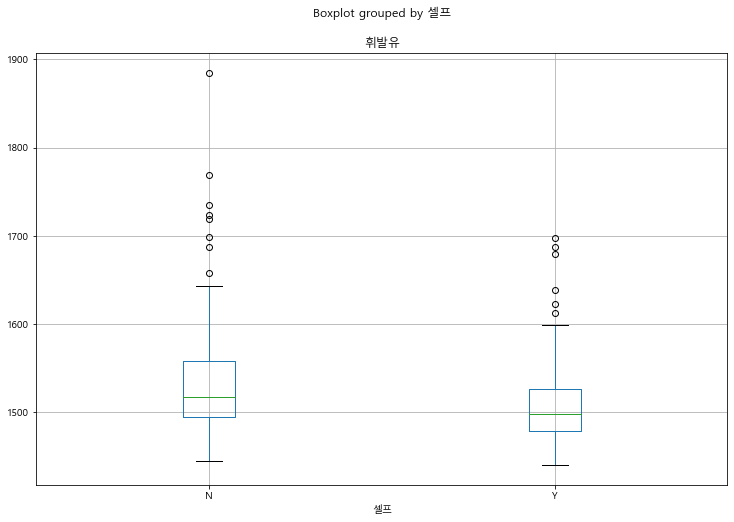

In [44]:
gas_satations2.boxplot( by='셀프', column='휘발유', figsize=(12,8) )

In [45]:
# 브랜드별 셀프 주유소의 가격 비교
import seaborn as sns

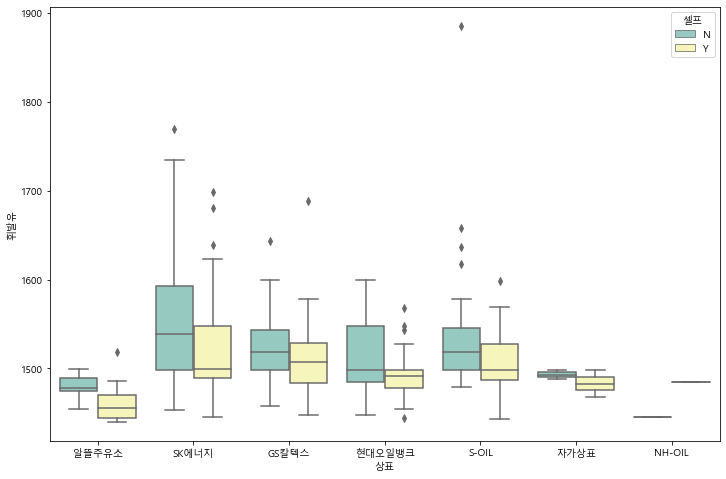

In [46]:
plt.figure( figsize=(12, 8) )
sns.boxplot( x='상표', y='휘발유', hue='셀프', data=gas_satations2, palette='Set3' )
plt.show()

In [47]:
gas_satations2.head(2)

,store,주소,휘발유,셀프,상표,자치구
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473.0,N,알뜰주유소,금정구
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478.0,N,SK에너지,금정구


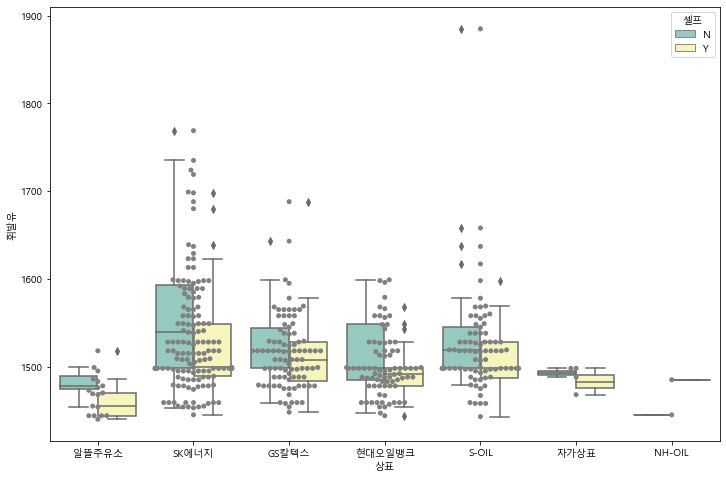

In [48]:
plt.figure( figsize=(12, 8) )
sns.boxplot( x='상표', y='휘발유', hue='셀프', data=gas_satations2, palette='Set3' )
# 산점도 확인
sns.swarmplot( x='상표', y='휘발유',  data=gas_satations2, color='.5')
plt.show()

### 지도 시각화 표시

- 부산 지도상에 주요 가격 표시

In [49]:
import json
import folium

In [50]:
# 가격 오름차순
gas_satations2.sort_values( by='휘발유', ascending=True ).head(20)

,store,주소,휘발유,셀프,상표,자치구
332,새마당주유소,부산광역시 사하구 장평로 152 (장림동),1440.0,Y,알뜰주유소,사하구
278,(주)좋은기름나라새사상셀프주유소지점,부산 사상구 새벽로 154 (감전동),1443.0,Y,S-OIL,사상구
279,세원주유소,부산 사상구 학감대로 178 (학장동),1444.0,Y,알뜰주유소,사상구
280,용마주유소,부산광역시 사상구 가야대로 329 (주례동),1444.0,Y,알뜰주유소,사상구
281,스마트주유소,부산 사상구 가야대로 377,1444.0,Y,현대오일뱅크,사상구
282,우리주유소,부산광역시 사상구 백양대로 701 (덕포동),1444.0,Y,알뜰주유소,사상구
283,부영석유(주)도매주유소,부산 사상구 가야대로 10 (감전동),1444.0,Y,알뜰주유소,사상구
365,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),1445.0,N,NH-OIL,강서구
284,광신석유(주)가야로주유소,부산 사상구 가야대로 395,1445.0,Y,SK에너지,사상구
333,다대주유소,부산 사하구 다대로 409,1447.0,N,현대오일뱅크,사하구


In [51]:
# 자치구별 평균 가격을 만들어서 gu_price df 생성
import numpy as np
gu_pi_data = pd.pivot_table( gas_satations2, 
                             index=['자치구'], values=['휘발유'], aggfunc=np.mean )
len( gu_pi_data.index )

16

In [52]:
gu_pi_data.describe()

,휘발유
count,16.000000
mean,1522.487275
std,24.473223
min,1502.760870
25%,1507.509259
50%,1511.319693
75%,1527.840545
max,1594.333333


In [53]:
busan_geo_path = './busan_area_gps.json'
busan_geo_str  = json.load( open(busan_geo_path, encoding='utf-8') ) 

In [54]:
map = folium.Map( location=[35.209708,129.0949783], zoom_start=10.5, tiles='Stamen Toner' )
# 자치구별 영역 그리기(주유소 휘발유값 기준)
map.choropleth( geo_data=busan_geo_str, 
                data = gu_pi_data,
                columns = [gu_pi_data.index, '휘발유'],
                fill_color='PuRd',
                key_on='feature.properties.name')
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [55]:
# 위치 정보 획득 
KAKAO_API_KEY = 'fddb410c32edf2164996e6b8f3f9fb98'
def netGetGeocoder(  query ):
    url  = '''
    https://dapi.kakao.com/v2/local/search/address.json?query={0}&category_group_code=PO3
    '''.format( query )
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    }
    # API 쿼리 수행
    res = requests.get( url , headers=headers )
    res = res.json()
#     print(res)
    if not res['documents']:
        return 0, 0
    return res['documents'][0]['y'],res['documents'][0]['x']

In [56]:
# # 반복해서 관할서의 이름을 완성하여 출력(print)하시오
# # 진행율
# # pip install tqdm
# from tqdm import tqdm_notebook

# # 데이터를 담는 자료형
# police_station_info = []

# # 경찰서 이름 개수만큼 반복
# for name in tqdm_notebook(crime_per_police.index):
#     # 검색어 획득
#     query = '서울%s경찰서' % name
#     #print( '서울%s경찰서' % name )
#     police_station_info.append( netGetGeocoder( query  ) )

# police_station_info
# tqdm 확인을 위해 만재형 코드 복사 해옴

from tqdm import tqdm_notebook
import requests
addr_lat = []
addr_lng = []
for addr in tqdm_notebook( gas_satations2['주소'] ):
    #print( addr )
    # gps 획득
    tmp = netGetGeocoder( addr )
    addr_lat.append( tmp[0] )
    addr_lng.append( tmp[1] )
# 컬럼 추가
gas_satations2['lat'] = addr_lat
gas_satations2['lng'] = addr_lng
gas_satations2.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,store,주소,휘발유,셀프,상표,자치구,lat,lng
0,훼미리알뜰주유소,부산 금정구 두실로 2 (남산동),1473.0,N,알뜰주유소,금정구,35.26054361552982,129.09108415788532
1,에스원에너지(주)금강주유소,부산 금정구 중앙대로 1972,1478.0,N,SK에너지,금정구,35.26042595604724,129.09163486844983


In [57]:
# 표본은 가격 최상위, 최하위 10개씩만 지도에 마킹
gas_satations2_high = gas_satations2.sort_values(by='휘발유', ascending=False)[:10]
gas_satations2_high

,store,주소,휘발유,셀프,상표,자치구,lat,lng
211,천일주유소,부산 동구 중앙대로 168 (초량동),1885.0,N,S-OIL,동구,35.11236303849652,129.03875916869
331,강변주유소,부산 사상구 낙동대로 1274 (삼락동),1769.0,N,SK에너지,사상구,35.17392536312102,128.97713917093319
235,동래,부산 동래구 중앙대로 1371 (온천동),1735.0,N,SK에너지,동래구,35.20960768458388,129.07745289874893
81,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),1724.0,N,SK에너지,영도구,35.09500147085103,129.0476072028376
23,국제,부산 금정구 중앙대로 1756,1719.0,N,SK에너지,금정구,35.24113091161727,129.09328761528587
168,(주)SK정관주유소,부산 기장군 정관면 정관덕산길 21,1699.0,N,SK에너지,기장군,35.32320716127476,129.18251011698803
52,(주)청유주유소,부산 수영구 좌수영로 147 (망미동),1698.0,Y,SK에너지,수영구,35.17692566025697,129.11755060455167
51,(주)호유주유소,부산 수영구 좌수영로 151 (망미동),1688.0,Y,GS칼텍스,수영구,35.1774417276108,129.11751570124986
80,남항주유소,부산 영도구 남항서로 116,1688.0,N,SK에너지,영도구,35.090711165295836,129.0373822822934
50,SK에너지(주)강일주유소,부산 수영구 연수로 411,1680.0,Y,SK에너지,수영구,35.16824459930418,129.11431847339742


In [58]:
gas_satations2_low= gas_satations2.sort_values(by='휘발유', ascending=True)[:10]
gas_satations2_low

,store,주소,휘발유,셀프,상표,자치구,lat,lng
332,새마당주유소,부산광역시 사하구 장평로 152 (장림동),1440.0,Y,알뜰주유소,사하구,35.07983115849022,128.97293609427803
278,(주)좋은기름나라새사상셀프주유소지점,부산 사상구 새벽로 154 (감전동),1443.0,Y,S-OIL,사상구,35.15497001548498,128.98342200036973
279,세원주유소,부산 사상구 학감대로 178 (학장동),1444.0,Y,알뜰주유소,사상구,35.146925727938324,128.9890505233911
280,용마주유소,부산광역시 사상구 가야대로 329 (주례동),1444.0,Y,알뜰주유소,사상구,35.15127921488832,129.00855112159152
281,스마트주유소,부산 사상구 가야대로 377,1444.0,Y,현대오일뱅크,사상구,35.151755311706594,129.01396120981997
282,우리주유소,부산광역시 사상구 백양대로 701 (덕포동),1444.0,Y,알뜰주유소,사상구,35.169295490892345,128.98823446386552
283,부영석유(주)도매주유소,부산 사상구 가야대로 10 (감전동),1444.0,Y,알뜰주유소,사상구,35.15164794668776,128.9738436530412
365,부산축산농협주유소,부산 강서구 낙동남로 448 (녹산동),1445.0,N,NH-OIL,강서구,35.11192073422368,128.86853872145076
284,광신석유(주)가야로주유소,부산 사상구 가야대로 395,1445.0,Y,SK에너지,사상구,35.151858707289456,129.01576322077398
333,다대주유소,부산 사하구 다대로 409,1447.0,N,현대오일뱅크,사하구,0,0


In [59]:
map = folium.Map( location=[35.209708,129.0949783], zoom_start=10.5 )
# 자치구별 영역 그리기(주유소 휘발유값 기준)
map.choropleth( geo_data=busan_geo_str, 
                data = gu_pi_data,
                columns = [gu_pi_data.index, '휘발유'],
                fill_color='PuRd',
                key_on='feature.properties.name')

# 최저가 주요소 탑 10
for idx in gas_satations2_low.index:
    folium.CircleMarker( [ float(gas_satations2_low['lat'][idx]),
                           float(gas_satations2_low['lng'][idx]) ],
                         radius=10, color='#00D8FF', 
                         fill_color='#00D8FF', fill=True ).add_to(map)

# 최고가 주요소 탑 10
for idx in gas_satations2_high.index:
    if float(gas_satations2_high['lat'][idx]):# 데이터중에 위도 0은 배제
        folium.CircleMarker( [ float(gas_satations2_high['lat'][idx]),
                               float(gas_satations2_high['lng'][idx]) ],
                             radius=10, color='#CC3D3D', 
                             fill_color='#CC3D3D', fill=True ).add_to(map)
    
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
